# Encontrando números primos

Encontrar numeros primos siempre ha representado un reto, pues aunque su definición parezca trivial, entre más grande sea un número $n$ mayor es el número de interaciones necesarias para poder comprobar si este número es o no un número primo. Primero recordamos que un número primo es un numero $n\in \mathbb{N} $ tál que $ \forall\  a \in \mathbb{N},\ a\in (1,n)$, $n/a \not\in \mathbb{N}$

Una forma trivial de atacar este problema es por inspección, para esto hacemos una función que pruebe pueda comprobar si un numero dado $n$ es primo o no.

In [35]:
import numpy as np
import math
import time
import matplotlib.pylab as plt
from collections import Counter

In [2]:
def basic_is_prime(n):
    result=True
    for i in range(2,n):
        if n%i==0:
            result = False
    return result

Esta función recibe un numero entero $n$ y revisa todos los números hasta $n-1$ buscando los posibles divisores de $n$ en el caso en el que ningún número divida a $n$ entre $2$ y $n-1$, se concluye entonces que $n$ es primo y por ende la función `basic_is_prime`retorna `True`.
Ahora vamos a usar esta función para encontrar los primeros números primos entre $0$ y $10000$.

In [6]:
start=time.time()
lista_basic_prime=[]
for i in range(2,10000):
    if basic_is_prime(i):
        lista_basic_prime.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 3.5791659355163574


Como se ve, esto es un algoritmo lento, si se quisiera determinar si un número grande es o no un número primo esto podría tardar demasiado, con lo cual nos lleva a considerar un algoritmo distinto para poder determinar si algún numero es primo o no.

## Algoritmo mejorado

suponga que $m=\sqrt{n}$, entonces $m\times m = n$. Ahora si $n$ no es un número primo entonces $n$ puede ser escrito como $a\times b \Rightarrow \ m\times m=a\times b$. Observemos que si $m$ es un numero real, mientras que n,a y b son numeros naturales.

Ahora tenemos 3 posibles casos:
1. $a>m \Rightarrow b<m$
2. $a=m \Rightarrow b=m$
3. $a<m \Rightarrow b>m$

Para todos estos 3 casos, se tiene que $\min (a,b)\leq m$. Por ende $m$ será una cota para encontrar al menos un factor de $n$, lo cual resulta ser una condición suficiente para mostrar que $n$ no es primo.

In [7]:
def new_is_prime(n):
    result=True
    for i in range(2,int(np.sqrt(n)+1)):
        if n%i==0:
            result = False
    return result

In [8]:
start=time.time()
lista_new_prime=[]
for i in range(2,10000):
    if new_is_prime(i):
        lista_new_prime.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 0.07704019546508789


Como se puede ver esto es un mejora significativa en el programa, sin embargo esto podría ser mejorado ligeramente más. Para esto se hace uso del hecho de que ningun número par puede ser un número primo, con lo cual la busqueda de puede hacerce de en los impares.

In [9]:
def list_of_primes(n):
    lista=np.array([2])
    for i in range(3,n+1,2):
        if new_is_prime(i):
            lista=np.append(lista,i)
    return lista

In [10]:
start=time.time()
lista_new_prime_2=list_of_primes(10000)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 0.0666501522064209


In [11]:
len(lista_basic_prime),len(lista_new_prime),len(lista_new_prime_2)

(1229, 1229, 1229)

Una de las aplicaciones que tiene el encontrar los numeros primos es la descomposición de un número en factores primos, una forma de implementar esto se podría hacer de la siguiente forma: 

# ------ Sugerir como ejercicio ------

Dado $n\in \mathbb{N}$ encuentre la descomposición en factores primos de $n$. el resultado debe estar dado como una cadena escrita de la forma:

$"(p1**n1)(p2**n2)...(pk**nk)"$

con $p(i)$ está ordenado de menor a mayor y $n(i)$ es vacio si $n(i)$ es 1.

Ejemplo: n= 86240, la función retorna $"(2** 5)(5)(7** 2)(11)"$

In [16]:
def get_prime_Factors(n):
    if type(n) is not int or n < 1:
        # Not an integer, negative or 0
        return []
    elif(n<3):
        return [n]
    factors=[]
    if new_is_prime(n):
        return [n]
    while(n>1):
        for i in range(2,n+1):
            if new_is_prime(i) and not n % i:
                n=int(n/i)
                factors.append(i)
                break
    return factors

In [17]:
def primeFactors(n):
    f= get_prime_Factors(n)
    factors = sorted(list(set(f)))
    powers = [f.count(factor) for factor in factors]
    result=""
    for i in range(len(factors)):
        if powers[i]==1:
            result+="("+str(factors[i])+")"
        else:
            result+="("+str(factors[i])+"**"+str(powers[i])+")"
    return result

Usemos la anterior función para calcular la descomposición en numeros primos de $512345021, 777546031$ y $7775460$

In [18]:
print(primeFactors(512345021),primeFactors(777546031),primeFactors(7775460), primeFactors(86240))

(512345021) (23567)(32993) (2**2)(3**3)(5)(7)(11**2)(17) (2**5)(5)(7**2)(11)


[Propuesta de la Solucion a este ejercicio](https://github.com/d2718nis/codewars-prime-number-decompositions)

# Metodos aleatorios para encontrar números primos

## Test de Fermat
Este es un test de complejidad $\mathbb{O}(\log(n)$ para comprobar si un número es primo o no. Este test está basado en _Fermat's Little Theorem_

**Fermat's Little Theorem**: si $n$ es un numero primo y $a$ es cualquier entero positivo menor que $n$, entonces $a^{n}$ es congruente a $a$ modulo $n$

Entonces si $n$ no es un numero primo, entonces en general para casi cualquier $a<n$ no se satisface el aterior teorema.

Este test difiere de la mayoria de los algoritmos convencionales, en la cual la respuesta del algoritmo garantiza que esta solución está correcta. Acá lo único que se puede decir de la respuesta proporcionada es que es probablemente correcta. De forma más precisa, si $n$ nunca falla el test de Fermat, se puede estar seguro de que $n$ es un número primo. Sin embargo, el hecho de que $n$ pase el test o no, no garantiza que $n$ sea primo o no, sólo se tiene un indicador de que muy probablemente lo sea. En resumen si este test se aplica una cantidad suficiente de veces y se tiene que $n$ siempre pasa el test, entonces la probabilidad de error al momento de decidir si este número es primo, se reduce tanto como se desee. 


El problema de este test aparece cuando se tiene que hacer la operación $a^{n}\ ({\mbox{mod}}\ n)$, pues si se hace de una forma "naïve" se tiene que la potencia $a^{n}$ crece muy rapido y esto hace que la la maquina no lo pueda escribir.
Para esto es entonce necesario hacer uso de otro tipo exponenciación, llamado "Exponenciación modular", este tipo de exponenciación resulta ser bastante útil en criptografia y esta aplicación resulta importante al tratar con números "Grandes".

[Link de referencias](https://en.wikipedia.org/wiki/Modular_exponentiation)

[link para hacer el algoritmo de exponenciación](https://eli.thegreenplace.net/2009/03/28/efficient-modular-exponentiation-algorithms)

[link de otro algoritmo de exponenciación](https://en.wikibooks.org/wiki/Algorithm_Implementation/Mathematics/Modular_Exponentiation)

In [19]:
def expmod(base, exp, n):
    r = 1
    for i in range(exp):
        r = r * base % n
    return r
def powmod(a,e,n):
    accum = 1; i = 0; apow2 = a
    while ((e>>i)>0):
        if ((e>>i) & 1):
            accum = (accum*apow2) % n
        apow2 = (apow2*apow2) % n
        i += 1
    return accum
# la funcion pow tambien puede ser usada en python

Para implementar el Test de Fermat primero se se escoge un numero aleatorio $a$ entre $1$ y $n-1$ y se verifica si el residuo de modulo $n$ de $a^{n}$ es igual a $a$.

In [20]:
def Fermat_Test(n,k):
    Test=True
    #a=np.random.choice(range(2,n),k,replace=False)
    #exp=expmod(a,n,n)
    #for i in range(len(a)):
     #   if a[i] != exp[i]:
      #      Test=False
       #     break
    for i in range(k):
        a=np.random.randint(2,n)
        exp=expmod(a,n,n)
        if exp != a:
            Test=False
            break
    return Test

In [22]:
start=time.time()
nueva_lista=[2]
for i in range(3,10000):
    if Fermat_Test(i,10):
        nueva_lista.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 9.812031745910645


Lo que se tiene acá es que aparentemente se está tomando más tiempo con este algoritmo que con el el propuesto anteriormente, no obstante, esto no es debido a que la cantidad de numero que está calculando no es exactamente la misma cantidad de números primos que hallamos anteriormente, esto se puede ver preguntando por la longitud de cada lista.

In [23]:
len(nueva_lista),len(list_of_primes(10000))

(1236, 1229)

Para ver cuales fueron los elementos que se agregaron de más, podemos comparar las listas.

In [25]:
lista_primos=list_of_primes(100000)
CH_num=[]
for i in range(len(nueva_lista)):
    if nueva_lista[i] not in lista_primos:
        CH_num.append(nueva_lista[i])
        #print(nueva_lista[i])
print(CH_num)

[561, 1105, 1729, 2465, 2821, 6601, 8911]


Se tiene entonces que los números que aparecieron son $561,1105,1729,2465,2821,6601,8911,10585, 15841, 29341, 41041, 46657 \ldots$, estos números como podemos ver no son primos pues tienen una descomposición en primos dada por:

In [26]:
for i in CH_num:
    print(i, "Se descompone como",primeFactors(i))

561 Se descompone como (3)(11)(17)
1105 Se descompone como (5)(13)(17)
1729 Se descompone como (7)(13)(19)
2465 Se descompone como (5)(17)(29)
2821 Se descompone como (7)(13)(31)
6601 Se descompone como (7)(23)(41)
8911 Se descompone como (7)(19)(67)


Esto no es conincidencia ni es problema de la cantidad de test que se efectuen, estos números son unos números bastante particulares llamado números de Carmichael y surgen del hecho de que el teorema de Fermat establece que si $a$ no es divisible por $p$ entonces $p$ divide a $a^{p}-a$:

$${\displaystyle \ p|a^{p}-a}.$$

Para determinar si un número n es primo o no, se escoge un número a que sea primo relativo con n y se calcula ${\displaystyle \ a^{n-1}{\pmod {n}}}$. Si el resultado es diferente a 1, el número es compuesto con toda certeza.

Desafortunadamente si el resultado es 1 no es posible asegurar que el número n es primo, ya que el inverso del teorema de Fermat no es válido: existen números compuestos a tales que ${\displaystyle a^{n}\equiv a{\pmod {n}}}$. Tales números se denominan pseudoprimos en la base a, por lo que la prueba propuesta no es en realidad una verdadera prueba de primalidad.

Los números de Carmichael son entonces números pseudoprimos en cualquier base: son los números para los que la prueba anterior falla para cualquier elección de base que sea primo relativo con el número dado.

## Ejercicio
Obtenga los primeros 20 números de Carmichael, para esto deberá hacer uso de algo más eficiente que el algoritmo planteado anteriormente.

$561, 1105, 1729, 2465, 2821, 6601, 8911, 10585, 15841, 29341, 41041, 46657, 52633, 62745, 63973, 75361, 101101, 115921, 126217, 162401$

Devido al problema que se tiene con el test de Fermat que existen números que logran pasar este test desapercibidos y que no son primos, pues resultaba que $a^{n}$ era congruente con $a$ modulo n para cualquier entero $a<n$. Aunque estos números fueran bastante extraños, se tiene entonces que el test de Fermat parecia no ser un buen test para evaluar si un número era o no primo, con lo cual es necesario recurrir a algún metodo un poco más elaborado para esto.

# Miller-Rabin Test
Este se deriva de una variante del teorema de Fermat. Para hacer uso de este test en un número $n$ se seleciona de forma aleatoria un número $a<n$ y este se eleva a la $n-1$ y se toma el modulo $n$, salvo que en el momento en el que se calcula esto por medio de la operación de la Exponenciación modular, se verifica si se ha descubierto una "Raiz cuadrada no trivieal de $1$ modulo $n$", esto es, un número que no sea igual a $1$ o $-1$ cuyo cuadrado es igual a 1 modulo $n$. Es posible demostrar que si tal raiz cuadrada no trivial de $1$ existe, entonces $n$ no es un número primo. Así mismo es posible demostrar que si $n$ es un numero impar que no es primo, entonces, para al menos la mitad de los números $a<n$, al calcular $a^{n-1}$ haciendo uso de la exponenciación modular, se puede determinar si el número es o no una raiz cuadrada no trivial de $1$ modulo $n$. Esta es la razón principal por la cual al hacer uso de este test, se tiene una certeza de si los resultados que se obtienen son los adecuados o no.

Para esto hacemos lo siguiente, supongamos que $n>1$ es un númere impar del cual queremos saber si es primo o no. Sean $s$ el número natural y $d$ el impar tales que $n-1 = 2^{s}d$ y $a$ un entero escogido aleatoriamente entre $2$ y $n-2$ 

__Paso 0__: Se calcula $x_{0} = a^{d}\ (mod\ n).$

Si ${\displaystyle x_{0}\equiv \pm 1\ (mod\ n)}$ , el test culmina con la conlcusión de que $n$ es probable primo.

__Paso 1__: En caso contrario se calcula ${\displaystyle x_{1}=x_{0}^{2}\ (mod\ n)}$.

Si ${\displaystyle x_{1}\equiv -1\ (mod\ n)} $, el test culmina con la conclusión de que n es probable primo.

__Paso $i$__: De igual forma, siempre que ${\displaystyle i<s-1}$ y ${\displaystyle x_{i-1}\neq \pm 1\ (mod\ n)}$, se calcula ${\displaystyle b_{i}=b_{i-1}^{2}\ (mod\ n)}$.

Si ${\displaystyle b_{i}\equiv -1\ (mod\ n)}$, el test culmina con la conclusión de que n es probable primo.


__Paso s-1__ Se calcula ${\displaystyle b_{k-1}=b_{k-2}^{2}\ (mod\ n)}$.

Si ${\displaystyle b_{k-1}\equiv -1\ (mod\ n)}$ , el test culmina con la conclusión de que n es probable primo.


En cualquier otro caso, el test culmina con la conclusión de que n no es primo.

In [27]:
def check(a,s ,d, n):
    x=pow(a,d,n)
    #print("%d ---- %d" %(a,x))
    if x==1:
        return True
    for i in range(s-1):
        if x==n-1:
            return True
        x=pow(x,2,n)
        #print("%d ---- %d" %(a,x))
    return x==n-1
def miller_rabin(n,k):
    # 2  es un número primo
    if n==2:
        return True
    '''todo numero par no es un número primo, (menos el 2)
    entonces la forma más rapida de verificar esto es viendo si 
    el ultimo elemento del número en binario es termina en 1 ( es impar)'''
    if not n & 1:
        return False
    s=0
    d=n-1
    #Esta parte se hace para determinar cuales son los valores de s y de d para así escribir n-1 como 2^{s}d
    while(d%2 == 0):
        #dividimos por 2
        d>>=1 # Esto es equivalente a divir por 2, el correr un 
        s+=1
    for i in range(k):
        a=np.random.randint(2,n)-1
        if not check(a,s,d,n):
            return False
    return True

In [28]:
start=time.time()
lista_miller_rabin=[2,3]
for i in range(4,50000):
    if miller_rabin(i,50):
        lista_miller_rabin.append(i)
end=time.time()
print("Tiempo tomado:",end-start)

Tiempo tomado: 1.4595377445220947


Aunque el tiempo tomado se redujo significativamente se observa que de igual forma los teste snteriores parecen funcionar mejor, sin embargo la ventaja de este test aparece cuando se quiere verificar si números muy grandes son primos o no, para esto probemos con un números tales como los que se encuentran en el archivo `Primos_1E11.txt`, los cuales són números primos bastante grandes.

In [29]:
archivo_primos=open("Primos_1E11.txt","r")
numeros_primos_lista=np.array([],dtype=int)
for i in archivo_primos.readlines():
    numeros=i.split()
    numeros=np.array(numeros,dtype=int)
    numeros_primos_lista=np.append(numeros_primos_lista,numeros)
archivo_primos.close()

In [30]:
start=time.time()
for i in numeros_primos_lista:
    new_is_prime(i)
end=time.time()
print("Tiempo tomado metodo convencional:",end-start)

Tiempo tomado metodo convencional: 36.38381052017212


In [31]:
start=time.time()
for i in numeros_primos_lista:
    #print(i,type(i))
    miller_rabin(int(i),50)
end=time.time()
print("Tiempo tomado metodo Miller Rabin:",end-start)

Tiempo tomado metodo Miller Rabin: 0.19503378868103027


Con esto se puede evidenciar lo potente del método de Miller-Rabin comparado con los metodos convencionales.

In [58]:
N=20
i_s=[]
j_s=[]
for i in range(1,N):
    for j in range(i,N):
        if new_is_prime(i**2 + j**2):
            i_s.append(i)
            j_s.append(j)
i_s=np.array(i_s)
j_s=np.array(j_s)

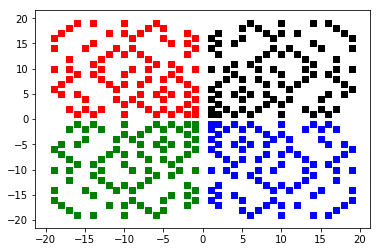

In [59]:
for i,j in zip(i_s,j_s):
        #Cuadrante 1 del plano
        plt.scatter(i,j,color="k",marker="s")
        plt.scatter(j,i,color="k",marker="s")
        #Cuadrante 4 del plano
        plt.scatter(i,-j,color="b",marker="s")
        plt.scatter(j,-i,color="b",marker="s")
        #Cuadrante 2 del plano
        plt.scatter(-i,j,color="r",marker="s")
        plt.scatter(-j,i,color="r",marker="s")
        #Cuadrante 3 del plano
        plt.scatter(-i,-j,color="g",marker="s")
        plt.scatter(-j,-i,color="g",marker="s")
plt.show()

In [57]:
a=[]
for i in range(1,N):
    for j in range(1,N):
        if new_is_prime(i**2 + j**2):
            a.append(i**2 + j**2)
print(sorted(a))

[2, 5, 5, 13, 13, 17, 17, 29, 29, 37, 37, 41, 41, 53, 53, 61, 61, 73, 73, 89, 89, 97, 97, 113, 113]


# Intentos del KATA

In [ ]:
def new_get_prime_Factors(n):
    #if type(n) is not int or n < 1:
        # Not an integer, negative or 0
     #   return []
    if(n<3):
        return [n]
    factors=[]
    if miller_rabin(n,50):
        return [n]
    while(n>1):
        for i in range(2,n+1):
            if miller_rabin(i,5) and not n % i:
                n=int(n/i)
                factors.append(i)
                break
    return factors
def new_primeFactors(n):
    f= new_get_prime_Factors(n)
    factors = sorted(list(set(f)))
    powers = [f.count(factor) for factor in factors]
    result=""
    for i in range(len(factors)):
        if powers[i]==1:
            result+="("+str(factors[i])+")"
        else:
            result+="("+str(factors[i])+"**"+str(powers[i])+")"
    return result

In [36]:
start=time.time()
print(new_primeFactors(int(numeros_primos_lista[50])+1))
end=time.time()
print("Tiempo tomado:",end-start)

(2)(5**2)(7**2)(107)(381461)
Tiempo tomado: 2.364825963973999


In [37]:
new_primeFactors(int(numeros_primos_lista[10]))

'(100000000183)'

In [38]:
def getAllPrimeFactors(n):
    if n == 1:
        return [1]

    result = []
    if isvalidparameter(n):
        factor = 2
        while n > 1:
            while n % factor == 0:
                n /= factor
                result.append(factor)
            factor += 1
    return result


def getUniquePrimeFactorsWithCount(n):
    result = [[], []]
    if isvalidparameter(n):
        factors = getAllPrimeFactors(n)
        for f in factors:
            if f in result[0]:
                result[1][-1] += 1
            else:
                result[0].append(f)
                result[1].append(1)
    return result


def getUniquePrimeFactorsWithProducts(n):
    result = []
    if isvalidparameter(n):
        factors = getUniquePrimeFactorsWithCount(n)
        result = map(lambda x: x[0] ** x[1], zip(factors[0], factors[1]))
    return result


def isvalidparameter(n):
    return isinstance(n, int) and n > 0

In [39]:
def new_primeFactors(n):
    f= getAllPrimeFactors(n)
    factors = sorted(list(set(f)))
    powers = [f.count(factor) for factor in factors]
    result=""
    for i in range(len(factors)):
        if powers[i]==1:
            result+="("+str(factors[i])+")"
        else:
            result+="("+str(factors[i])+"**"+str(powers[i])+")"
    return result

In [40]:
def last_primeFactors(n):
    ret = ''
    for i in xrange(2, n + 1):
        num = 0
        while(n % i == 0):
            num += 1
            n /= i
        if num > 0:
            ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
        if n == 1:
            return ret

In [60]:
def getAllPrimeFactors(n):
    if n == 1:
        return [1]
    result = []
    if isvalidparameter(n):
        factor = 2
        while n > 1:
            while n % factor == 0:
                n /= factor
                result.append(factor)
            factor += 1
    return result
def isvalidparameter(n):
    return isinstance(n, int) and n > 0
def my_primeFactors(n):
    f=getAllPrimeFactors(n)
    factors = sorted(list(set(f)))
    powers = [f.count(factor) for factor in factors]
    result=""
    for i in range(len(factors)):
        result+="({}{})".format(factors[i],"**%d" % powers[i] if powers[i]>1 else "")
    return result

In [80]:
my_primeFactors(100000001142)
end=time.time()

'(2)(3**3)(16333)(113381)'

In [78]:
numeros_primos_lista[50]
miller_rabin(1000000011401,50)

False

# Respuesta final del KATA

In [109]:
def getAllPrimeFactors(n):
    if n == 1:
        return [1]
    result = []
    if isvalidparameter(n):
        factor = 2
        while n > 1:
            #print(factor)
            while n % factor == 0:
                #print("divide por ",factor)
                n /= factor
                result.append(factor)
            factor += 1
    return result
def isvalidparameter(n):
    return isinstance(n, int) and n > 0
def my_primeFactors(n):
    f=getAllPrimeFactors(n)
    factors = sorted(list(set(f)))
    powers = [f.count(factor) for factor in factors]
    result=""
    for i in range(len(factors)):
        result+="({}{})".format(factors[i],"**%d" % powers[i] if powers[i]>1 else "")
    return result

# Algoritmo de Pollard's Rho

In [ ]:
def g(x,n):
    return (x**2 +1)%n

In [ ]:
n=777546031
x=np.random.randint(2,n)
y=np.random.randint(2,n)
d=1
while(d==1):
    #print(x,y)
    x= g(x,n)
    y=g(g(y,n),n)
    d=math.gcd(np.abs(x-y),n)
print(d)

## Solución descomposición primera version

In [ ]:
lista= list_of_primes(100000)

In [ ]:
def primeFactors_first(n):
    resto=n
    continuar=True
    val=[]
    while(continuar):
        for i in lista:
            if resto%i==0:
                resto=resto/i
                val.append(i)
                break        
        if resto==1:
            continuar=False
    dicc=Counter(val)
    result=""
    for i in sorted(dicc):
        if dicc[i]==1:
            result+="("+str(i)+")"
        else:
            result+="("+str(i)+"**"+str(dicc[i])+")"
    return result